In [87]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Building a spam detector

In [88]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/sms.tsv.txt'
sms = pd.read_table(url,names=['label', 'message'])
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [89]:
# spam example
sms.loc[sms.label=='spam', 'message'].iloc[100]

'To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT'

In [90]:
# ham example
sms.loc[sms.label=='ham', 'message'].iloc[100]

"Hmm...my uncle just informed me that he's paying the school directly. So pls buy food."

In [91]:
# feature matrix X, target vector y
X = sms.message
y = sms.label

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
# vectorizer
vect = CountVectorizer(max_features=1000, min_df=10) # we'll do a grid search later (Monday 11/13)
vect.fit(X_train)
vect

CountVectorizer(max_features=1000, min_df=10)

Accuracy: 0.9877961234745154


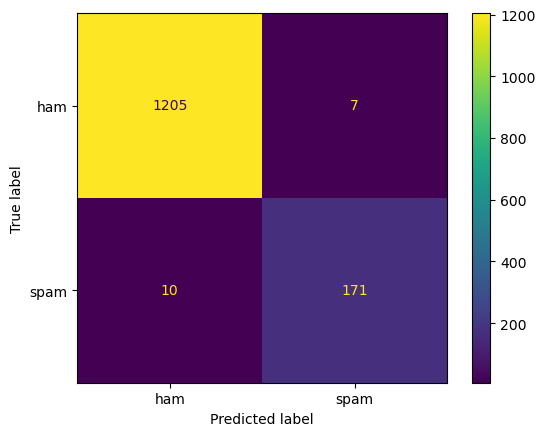

In [93]:
# document-term matrix
X_train_dtm = vect.transform(X_train)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

# Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
from sklearn import metrics
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_class, labels=['ham','spam'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['ham','spam'])
disp.plot()

In [101]:
# print a false negative (spam incorrectly classified as ham)
X_test[(y_test=='spam') & (y_pred_class=='ham')].iloc[7]

'SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO'

In [94]:
# vocabulary
# vect.vocabulary_

# vect.get_feature_names_out().tolist()